In [613]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as dates
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [614]:
df = pd.read_csv("NIFTY 50_Historical_PR_02071990to14072024.csv")
df

,Index Name,Date,Open,High,Low,Close
0,NIFTY 50,12 Jul 2024,24387.95,24592.2,24331.15,24502.15
1,NIFTY 50,11 Jul 2024,24396.55,24402.65,24193.75,24315.95
2,NIFTY 50,10 Jul 2024,24459.85,24461.05,24141.8,24324.45
3,NIFTY 50,09 Jul 2024,24351,24443.6,24331.9,24433.20
4,NIFTY 50,08 Jul 2024,24329.45,24344.6,24240.55,24320.55
...,...,...,...,...,...,...
8258,NIFTY 50,10 Jul 1990,-,-,-,288.69
8259,NIFTY 50,09 Jul 1990,-,-,-,289.69
8260,NIFTY 50,06 Jul 1990,-,-,-,289.04
8261,NIFTY 50,05 Jul 1990,-,-,-,284.04


In [615]:
df = df[::-1]
df = df[2500:]
df

,Index Name,Date,Open,High,Low,Close
5762,NIFTY 50,10 May 2001,1149.10,1151.60,1139.25,1144.95
5761,NIFTY 50,11 May 2001,1144.10,1146.85,1136.90,1140.50
5760,NIFTY 50,14 May 2001,1140.45,1146.25,1134.05,1140.80
5759,NIFTY 50,15 May 2001,1140.75,1147.75,1096.25,1145.30
5758,NIFTY 50,16 May 2001,1147.10,1163.15,1146.05,1151.15
...,...,...,...,...,...,...
4,NIFTY 50,08 Jul 2024,24329.45,24344.6,24240.55,24320.55
3,NIFTY 50,09 Jul 2024,24351,24443.6,24331.9,24433.20
2,NIFTY 50,10 Jul 2024,24459.85,24461.05,24141.8,24324.45
1,NIFTY 50,11 Jul 2024,24396.55,24402.65,24193.75,24315.95


In [616]:
df.shape

(5763, 6)

In [617]:
df = df.reset_index()
df = df.set_index('Date')
df.head()

,index,Index Name,Open,High,Low,Close
Date,,,,,,
10 May 2001,5762,NIFTY 50,1149.10,1151.60,1139.25,1144.95
11 May 2001,5761,NIFTY 50,1144.10,1146.85,1136.90,1140.50
14 May 2001,5760,NIFTY 50,1140.45,1146.25,1134.05,1140.80
15 May 2001,5759,NIFTY 50,1140.75,1147.75,1096.25,1145.30
16 May 2001,5758,NIFTY 50,1147.10,1163.15,1146.05,1151.15


In [618]:
col = ['index','Index Name']
df = df.drop(col,axis=1)
print(df)

                 Open      High       Low     Close
Date                                               
10 May 2001   1149.10   1151.60   1139.25   1144.95
11 May 2001   1144.10   1146.85   1136.90   1140.50
14 May 2001   1140.45   1146.25   1134.05   1140.80
15 May 2001   1140.75   1147.75   1096.25   1145.30
16 May 2001   1147.10   1163.15   1146.05   1151.15
...               ...       ...       ...       ...
08 Jul 2024  24329.45   24344.6  24240.55  24320.55
09 Jul 2024     24351   24443.6   24331.9  24433.20
10 Jul 2024  24459.85  24461.05   24141.8  24324.45
11 Jul 2024  24396.55  24402.65  24193.75  24315.95
12 Jul 2024  24387.95   24592.2  24331.15  24502.15

[5763 rows x 4 columns]


In [619]:
df.dtypes

Open      object
High      object
Low       object
Close    float64
dtype: object

In [620]:
df['Open'] = pd.to_numeric(df['Open'])
df['High'] = pd.to_numeric(df['High'])
df['Low'] = pd.to_numeric(df['Low'])
df.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [621]:
df.describe()

,Open,High,Low,Close
count,5763.000000,5763.000000,5763.000000,5763.000000
mean,7586.437567,7630.373417,7531.747553,7582.486179
std,5514.959321,5532.584697,5486.804483,5510.933212
min,853.000000,877.000000,849.950000,854.200000
25%,3456.425000,3489.450000,3399.275000,3460.000000
50%,5884.800000,5917.800000,5837.200000,5882.250000
75%,10619.075000,10661.875000,10561.575000,10607.350000
max,24459.850000,24592.200000,24331.900000,24502.150000


In [622]:
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [623]:
df =  df.dropna(axis=0)

In [624]:
print(df.isnull().sum())

Open     0
High     0
Low      0
Close    0
dtype: int64


In [625]:
df

,Open,High,Low,Close
Date,,,,
10 May 2001,1149.10,1151.60,1139.25,1144.95
11 May 2001,1144.10,1146.85,1136.90,1140.50
14 May 2001,1140.45,1146.25,1134.05,1140.80
15 May 2001,1140.75,1147.75,1096.25,1145.30
16 May 2001,1147.10,1163.15,1146.05,1151.15
...,...,...,...,...
08 Jul 2024,24329.45,24344.60,24240.55,24320.55
09 Jul 2024,24351.00,24443.60,24331.90,24433.20
10 Jul 2024,24459.85,24461.05,24141.80,24324.45


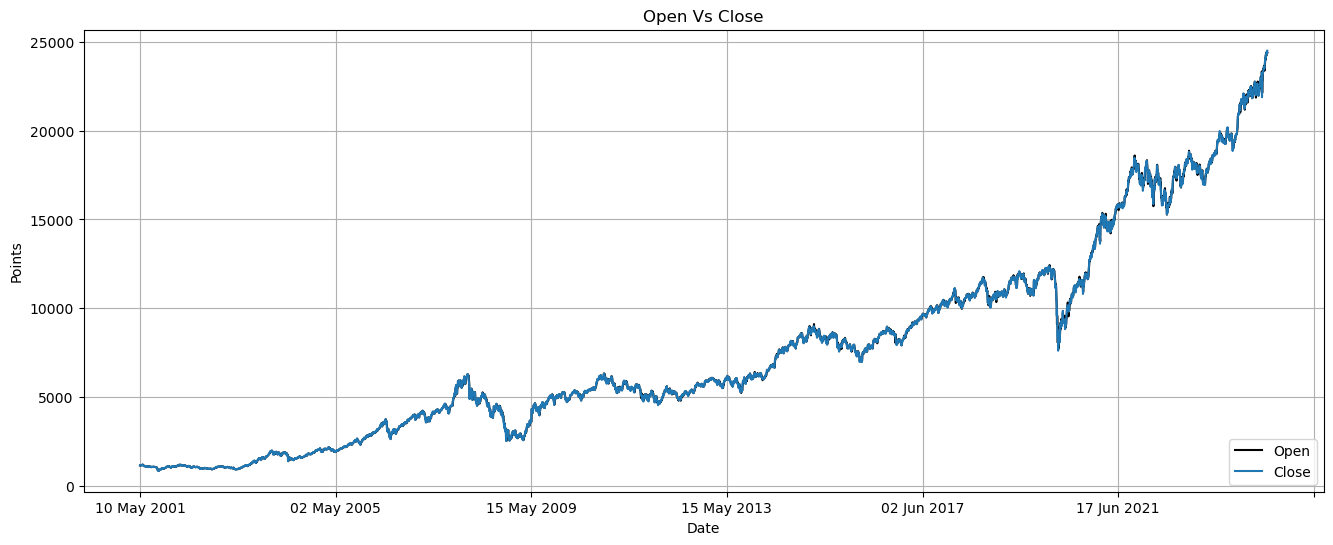

In [626]:
df['Open'].plot(figsize=(16,6),label='Open',color='black')
df['Close'].plot(figsize=(16,6),label='Close')
plt.ylabel('Points')
plt.title('Open Vs Close')
plt.grid()
plt.legend(['Open', 'Close'], loc = 'lower right')

In [627]:
y = df[['Close']]
x = df[['Open','High','Low']]
print("X",x.shape)
print("Y",y.shape)

X (5763, 3)
Y (5763, 1)


total_days = int(len(df))
train_index = int(total_days * 0.7) # 70% Training Data 30% Testing Data
test_index = train_index
print(train_index)

In [629]:
print(x)

                 Open      High       Low
Date                                     
10 May 2001   1149.10   1151.60   1139.25
11 May 2001   1144.10   1146.85   1136.90
14 May 2001   1140.45   1146.25   1134.05
15 May 2001   1140.75   1147.75   1096.25
16 May 2001   1147.10   1163.15   1146.05
...               ...       ...       ...
08 Jul 2024  24329.45  24344.60  24240.55
09 Jul 2024  24351.00  24443.60  24331.90
10 Jul 2024  24459.85  24461.05  24141.80
11 Jul 2024  24396.55  24402.65  24193.75
12 Jul 2024  24387.95  24592.20  24331.15

[5763 rows x 3 columns]


In [630]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.01254297, 0.01157907, 0.0123201 ],
       [0.01233117, 0.01137878, 0.01222002],
       [0.01217655, 0.01135348, 0.01209865],
       ...,
       [1.        , 0.99446979, 0.99190442],
       [0.99731857, 0.99200724, 0.99411676],
       [0.99695427, 1.        , 0.99996806]])

X_train = x[:train_index]
Y_train = y[:train_index]
X_test = x[test_index:]
Y_test = y[test_index:]

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

model = KNeighborsRegressor(n_neighbors=1)
model.fit(X_train,Y_train)

In [719]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(4610, 3) (1153, 3) (4610, 1) (1153, 1)


In [721]:
predict = model.predict(X_test)

In [723]:
accuracy = model.score(X_test,Y_test)
print(accuracy*100)

63.16244491482929


In [655]:
X_train.shape , Y_train.shape

((3861, 3), (3861, 1))

In [657]:
print(predict[4])
print(Y_test)

[4749.95]
                Close
Date                 
05 Mar 2004   1867.70
04 Feb 2021  14895.65
18 Aug 2017   9837.40
30 Sep 2002    963.15
05 Jan 2012   4749.95
...               ...
28 Nov 2022  18562.75
02 Dec 2004   1999.00
07 Sep 2021  17362.10
09 Jan 2023  18101.20
14 Oct 2019  11341.15

[1902 rows x 1 columns]


In [695]:
Y_test= Y_test.sort_values('Date')


In [757]:
final = pd.DataFrame()
final['Date'] = Y_test.index
final = final.sort_values('Date')
final = final.set_index('Date')
final['Close'] = Y_test['Close']
final['Pred'] = predict


In [759]:
final

,Close,Pred
Date,,
01 Apr 2011,5826.05,1025.25
01 Apr 2019,11669.15,890.00
01 Aug 2003,1195.75,2776.20
01 Aug 2007,4345.85,1717.50
01 Aug 2008,4413.55,5078.60
...,...,...
31 May 2022,16584.55,1138.45
31 Oct 2006,3744.10,8809.35
31 Oct 2008,2885.60,9915.95


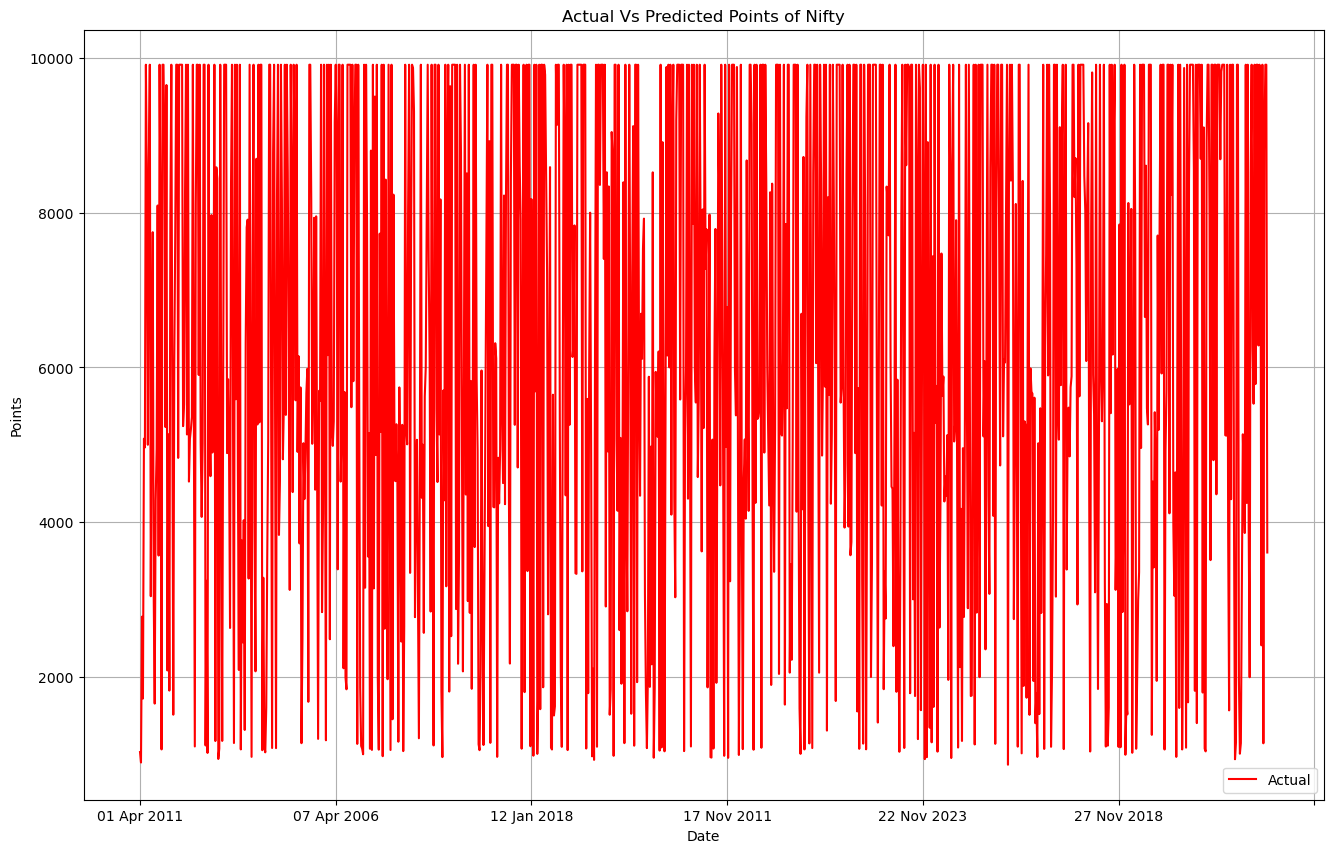

In [761]:
#df['Close'][ind].plot(figsize=(16,10),color='black')
final['Pred'].plot(figsize=(16,10),color='red')
plt.ylabel('Points')
plt.title('Actual Vs Predicted Points of Nifty')
plt.grid()
plt.legend(['Actual', 'Predictions'], loc = 'lower right')


In [755]:
ind = final.index
ind.sort(reverse)

TypeError: cannot sort an Index object in-place, use sort_values instead